In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [99]:
data = pd.read_csv("executions/orders.csv")
data

,id,order_id,trader,event,kind,side,price,qty,instrument,sequence,time,execution_time,status
0,94a4821a-8e9c-4e0f-a69c-836c0e013007,d637cd2a-1c82-49b5-bda3-e3f26d54c76f,89800,New,Limit,Sell,101.12,4910.0,AAPL,0,2022-10-12T19:54:43.121907400Z,23900,Placed
1,c56780fa-5aa8-4827-80b4-c108654306af,973777e4-0443-4342-8ed1-3f43fa392820,26945,New,Limit,Sell,100.92,3464.0,AAPL,1,2022-10-12T19:54:43.121934Z,13700,Placed
2,ce937c19-d0d5-429c-8062-ae96a873e6e7,f699a708-ff8c-4b82-80bd-7b3799152916,77784,New,Limit,Sell,101.70,493.0,AAPL,2,2022-10-12T19:54:43.121937400Z,9400,Placed
3,5bc53ed4-ae90-4525-ac3d-26bef3e074c0,fb7493d7-a380-4170-bd6e-53126f3f681d,95810,New,Market,Sell,100.00,543.0,AAPL,3,2022-10-12T19:54:43.121940800Z,300,Unfilled
4,c06b37ba-5e3d-4f34-aa3f-0107721c0bae,be43bbff-8e10-42ba-9a34-f5dacfed4570,75394,New,Limit,Buy,98.81,7930.0,AAPL,4,2022-10-12T19:54:43.121959900Z,9800,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,7f5f02ce-3718-4740-841c-b7f596fe8254,2c7da803-73c5-486f-a351-bf844887d34e,11042,New,Market,Buy,100.00,766.0,AAPL,999995,2022-10-12T19:54:52.715112500Z,500,Filled
999996,6a7b3700-a569-4141-9537-76db813576dd,0c8f0689-989a-4908-a784-ed8a3e33f36d,54773,New,Limit,Sell,100.32,8697.0,AAPL,999996,2022-10-12T19:54:52.715115Z,500,Placed
999997,972a1182-2354-4997-8e79-e636d88e023d,dfb1a223-4a02-4982-baa1-443b4ab4f86d,2223,New,Market,Buy,100.00,9338.0,AAPL,999997,2022-10-12T19:54:52.715130Z,600,Filled
999998,d92b9d53-0f18-4f87-9516-56ca91be162f,29e458ac-0ef3-4ed6-977b-29f034383dde,72927,New,Limit,Buy,98.60,4903.0,AAPL,999998,2022-10-12T19:54:52.715132500Z,600,Placed


# Transactions per second (TPS)

1933461 TPS


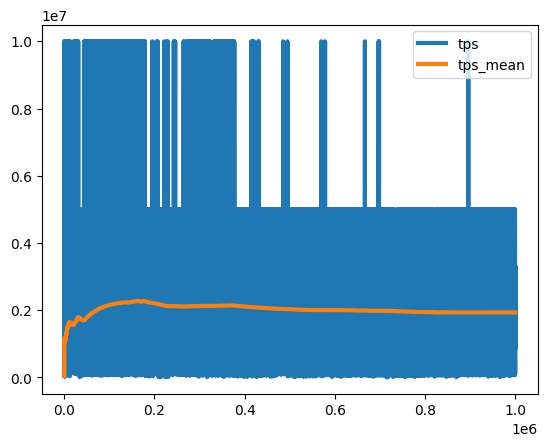

In [100]:
df = data.copy()
df['tps'] = 1e9 / df.execution_time
df['tps_mean'] = df.tps.expanding().mean()
df[["tps","tps_mean"]].plot(legend=True, linewidth=3)
print(f"{int(df['tps_mean'].iloc[-1])} TPS")

# Distribution of quantities per order

<AxesSubplot: >

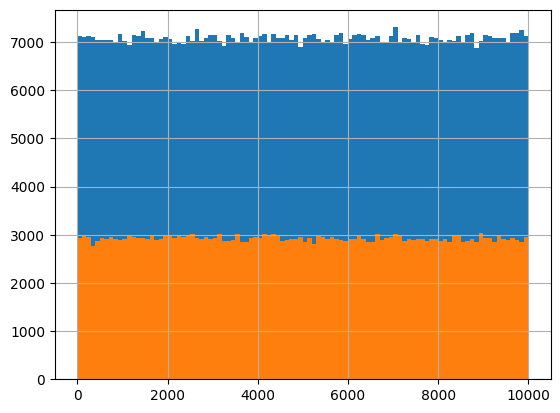

In [401]:
df = data.copy()
df[df["kind"]=="Limit"].qty.hist(bins=100)
df[df["kind"]=="Market"].qty.hist(bins=100)

# Distribution of prices per order

<AxesSubplot: >

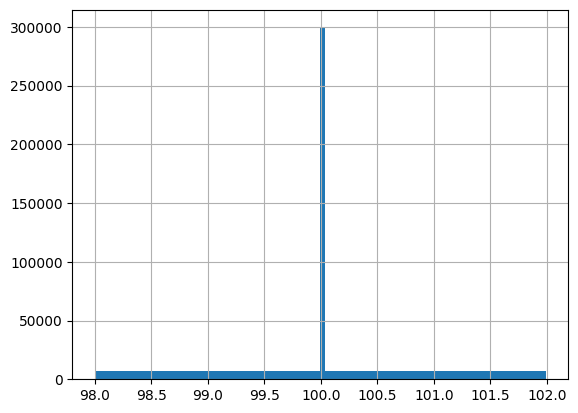

In [102]:
df = data.copy()
df.price.hist(bins=100)

<AxesSubplot: xlabel='side'>

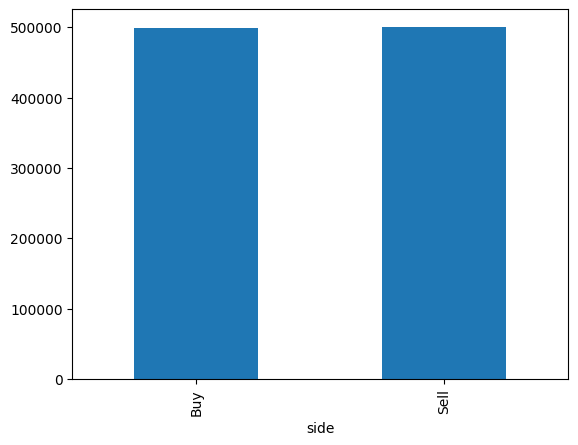

In [103]:
df = data.copy()
df.groupby(["side"]).id.count().plot(kind="bar")

<AxesSubplot: xlabel='event'>

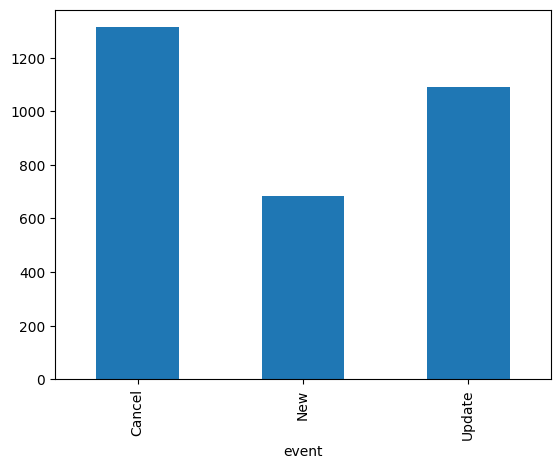

In [104]:
df = data.copy()
df.groupby(["event"]).execution_time.mean().plot(kind="bar")

<AxesSubplot: xlabel='status'>

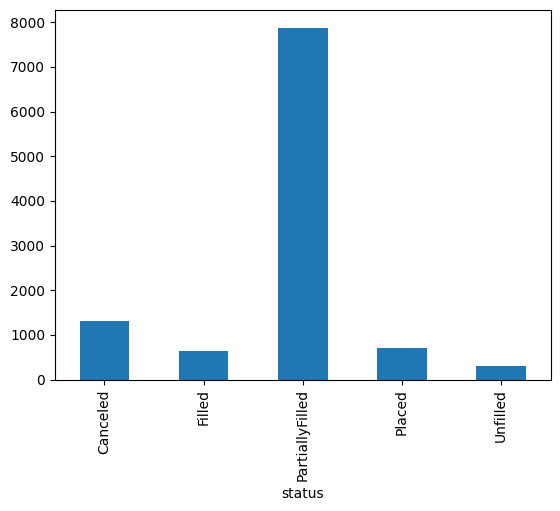

In [105]:
df = data.copy()
df.groupby(["status"]).execution_time.mean().plot(kind="bar")

status
Canceled             1159
Filled             292463
PartiallyFilled        25
Placed             706352
Unfilled                1
Name: id, dtype: int64

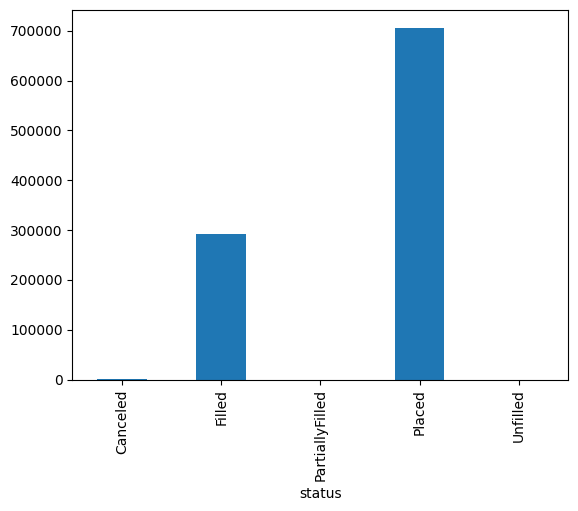

In [106]:
df = data.copy()
df.groupby(["status"]).id.count().plot(kind="bar")
df.groupby(["status"]).id.count()

kind
Limit     707686
Market    292314
Name: id, dtype: int64

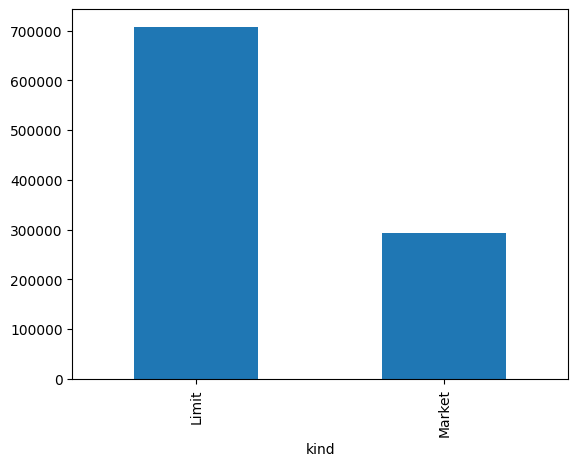

In [107]:
df = data.copy()
df.groupby(["kind"]).id.count().plot(kind="bar")
df.groupby(["kind"]).id.count()

# Execution times per order

<AxesSubplot: >

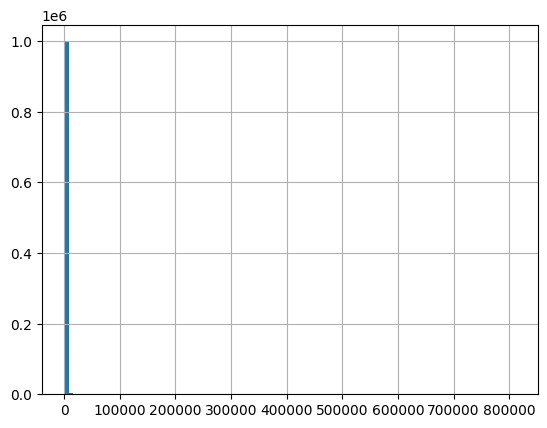

In [108]:
df['execution_time'].hist(bins=100)

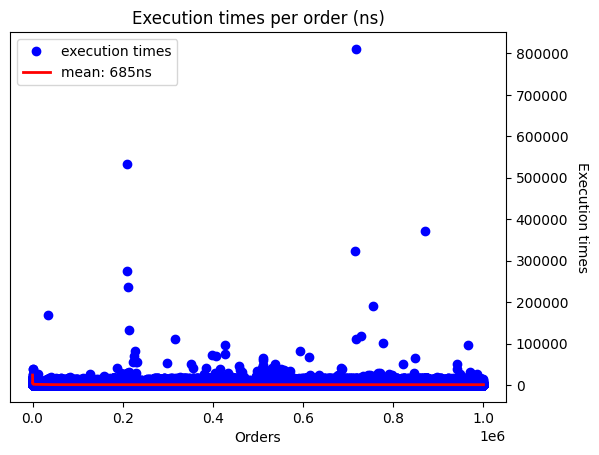

In [109]:
df = data.copy()
fig, ax = plt.subplots()
plt.xlabel(f'Orders')
plt.ylabel(f'Execution times', rotation=270, labelpad=15)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.title(f'Execution times per order (ns)')

mean = df['execution_time'].expanding().mean()
ax.plot(df["execution_time"], 'o', c='b', label="execution times")
ax.plot(mean, 'r', linewidth=2, label=f"mean: {int(mean.iloc[-1])}ns")
ax.legend()
fig.patch.set_facecolor('xkcd:white')
# fig.set_size_inches(20, 10)

# Filtering outliers (<2std)

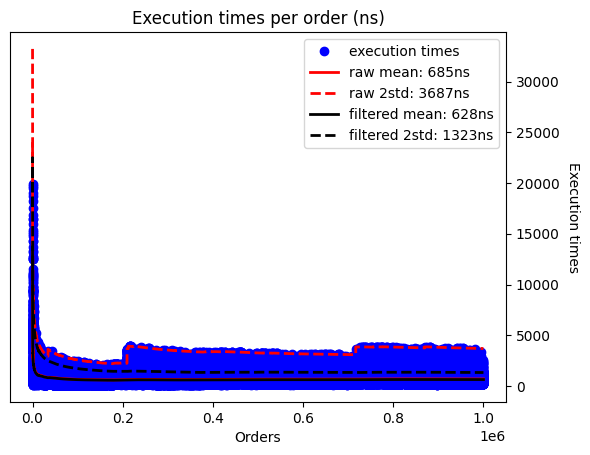

In [110]:
df = data.copy()
fig, ax = plt.subplots()
plt.xlabel(f'Orders')
plt.ylabel(f'Execution times', rotation=270, labelpad=15)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.title(f'Execution times per order (ns)')
std = 2
mean = df['execution_time'].expanding().mean()
outliner_filter = df['execution_time'].expanding().mean() + df['execution_time'].expanding().std()*std
filtered = df[df["execution_time"] < outliner_filter]["execution_time"]
mean_filtered = filtered.expanding().mean()
outliner_filter_filtered = filtered.expanding().mean() + filtered.expanding().std()*std
ax.plot(df[df["execution_time"] < outliner_filter]["execution_time"], 'o', c='b', label="execution times")
ax.plot(mean, 'r', linewidth=2, label=f"raw mean: {int(mean.iloc[-1])}ns")
ax.plot(outliner_filter, 'r--', linewidth=2, label=f"raw 2std: {int(outliner_filter.iloc[-1])}ns")
ax.plot(mean_filtered, 'k', linewidth=2, label=f"filtered mean: {int(mean_filtered.iloc[-1])}ns")
ax.plot(outliner_filter_filtered, 'k--', linewidth=2, label=f"filtered 2std: {int(outliner_filter_filtered.iloc[-1])}ns")
ax.legend()
fig.patch.set_facecolor('xkcd:white')
# fig.set_size_inches(20, 10)

# Number of outliers

In [111]:
mean = df['execution_time'].expanding().mean()
outliner_filter = df['execution_time'].expanding().mean() + df['execution_time'].expanding().std()*2
outliers = df[df["execution_time"] > outliner_filter].count().id
print(f"{round(outliers/len(df)*100,2)}%")

0.62%
